# Figure 2 

This Notebook will recapitulate the findings from Figure 2 of the paper STATE-DEPENDENT RESPONSES TO INTRACRANIAL BRAIN STIMULATION IN DEPRESSION: A CASE REPORT. In order to run this notebook please ensure you have installed the relevant packages, from *requirements.txt*. Data will be included in the github repo. Please direct inquiries to katherine.scangos@ucsf.edu or ghassan.makhoul@ucsf.edu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from seaborn import plotting_context
import re
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
#Set up Likert Dataframe
stim_resp_df = pd.read_csv('clin_stim_resp_full.csv', header =0)

#Remove TMS - like sessions 
stim_resp_df= stim_resp_df[~stim_resp_df.full_params.apply(lambda x: 'TMS' in x)]
stim_resp_df


,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
0,ROFC 5+/6-,100Hz 3mA 1s,0,0,0,Stim safety survey,1,100Hz,3mA,1s
1,ROFC 5+/6-,100Hz 3mA 3s,0,0,0,Stim safety survey,2,100Hz,3mA,3s
2,ROFC 5+/6-,100Hz 6mA 1s,0,0,0,Stim safety survey,3,100Hz,6mA,1s
3,ROFC 5+/6-,100Hz 6mA 3s,0,0,0,Stim safety survey,4,100Hz,6mA,3s
4,ROFC 3+/4-,100Hz 3mA 1s,0,0,-1,Stim safety survey,5,100Hz,3mA,1s
5,ROFC 3+/4-,100Hz 3mA 3s,1,0,0,Stim safety survey,6,100Hz,3mA,3s
6,ROFC 3+/4-,100Hz 6mA 1s,0,0,-1,Stim safety survey,7,100Hz,6mA,1s
7,ROFC 3+/4-,100Hz 6mA 3s,1,0,0,Stim safety survey,8,100Hz,6mA,3s
8,RH 3+/4-,100Hz 3mA 1s,0,0,0,Stim safety survey,9,100Hz,3mA,1s
9,RH 3+/4-,100Hz 3mA 3s,0,0,-1,Stim safety survey,10,100Hz,3mA,3s


## a) Effects of stim on arousal grouped by stim site

In [3]:
## Generate Df for ROFC stim trials 
rofc_df = stim_resp_df[stim_resp_df.stim_site == 'ROFC 7+/1-'].copy()
tmp = rofc_df[rofc_df.freq == '1Hz']
tmp = tmp[tmp.amps=='6mA']
rofc_df = tmp
rofc_df


,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
60,ROFC 7+/1-,1Hz 6mA 10+s,0,1,0,Stim safety survey,61,1Hz,6mA,10+s
92,ROFC 7+/1-,1Hz 6mA 10+s,1,2,0,Stim safety survey,93,1Hz,6mA,10+s
104,ROFC 7+/1-,1Hz 6mA 3+min,0,0,-1,sham 1,105,1Hz,6mA,3+min
109,ROFC 7+/1-,1Hz 6mA 3+min,-1,2,0,sham 2,110,1Hz,6mA,3+min
124,ROFC 7+/1-,1Hz 6mA 3+min,-2,-1,0,sham 3,125,1Hz,6mA,3+min
140,ROFC 7+/1-,1Hz 6mA 3+min,-1,1,0,continuous,141,1Hz,6mA,3+min


In [28]:
## Generate Df for RSGC stim trials
rsgc_df = stim_resp_df[stim_resp_df.stim_site == 'RSGC 3+/4-'].copy()
rsgc_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
77,RSGC 3+/4-,100Hz 3mA 10+s,0,0,0,Stim safety survey,78,100Hz,3mA,10+s
78,RSGC 3+/4-,100Hz 6mA 10+s,-1,1,-1,Stim safety survey,79,100Hz,6mA,10+s
115,RSGC 3+/4-,100Hz 3mA 3+min,2,1,0,sham 2,116,100Hz,3mA,3+min
129,RSGC 3+/4-,100Hz 3mA 3+min,1,-2,0,sham 3,130,100Hz,3mA,3+min
132,RSGC 3+/4-,100Hz 3mA 3+min,0,-1,0,sham 3,133,100Hz,3mA,3+min
144,RSGC 3+/4-,100Hz 3mA 15min,0,0,0,plasticity1,145,100Hz,3mA,15min


In [5]:
## Generate Df for RVC stim trials
rvc_df = stim_resp_df[stim_resp_df.stim_site == 'RVC 2+/3-'].copy()
rvc_df = rvc_df[rvc_df.trial >0] #early trials are stim survey, all included for figure
rvc3_df = rvc_df[rvc_df.amps == '3mA']
rvc3_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
88,RVC 2+/3-,100Hz 3mA 10+s,0,1,-1,Stim safety survey,89,100Hz,3mA,10+s
122,RVC 2+/3-,100Hz 3mA 3+min,2,0,0,sham 2,123,100Hz,3mA,3+min
137,RVC 2+/3-,100Hz 3mA 10min,2,2,0,continuous,138,100Hz,3mA,10min
153,RVC 2+/3-,100Hz 3mA 3min,2,2,0,plasticity bonus,154,100Hz,3mA,3min
157,RVC 2+/3-,100Hz 3mA 3min,2,2,0,bonus,158,100Hz,3mA,3min


In [6]:
rofc_df
tmp_df = rofc_df.append(rvc3_df)
grouped_df = tmp_df.append(rsgc_df)
grouped_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
60,ROFC 7+/1-,1Hz 6mA 10+s,0,1,0,Stim safety survey,61,1Hz,6mA,10+s
92,ROFC 7+/1-,1Hz 6mA 10+s,1,2,0,Stim safety survey,93,1Hz,6mA,10+s
104,ROFC 7+/1-,1Hz 6mA 3+min,0,0,-1,sham 1,105,1Hz,6mA,3+min
109,ROFC 7+/1-,1Hz 6mA 3+min,-1,2,0,sham 2,110,1Hz,6mA,3+min
124,ROFC 7+/1-,1Hz 6mA 3+min,-2,-1,0,sham 3,125,1Hz,6mA,3+min
140,ROFC 7+/1-,1Hz 6mA 3+min,-1,1,0,continuous,141,1Hz,6mA,3+min
88,RVC 2+/3-,100Hz 3mA 10+s,0,1,-1,Stim safety survey,89,100Hz,3mA,10+s
122,RVC 2+/3-,100Hz 3mA 3+min,2,0,0,sham 2,123,100Hz,3mA,3+min
137,RVC 2+/3-,100Hz 3mA 10min,2,2,0,continuous,138,100Hz,3mA,10min
153,RVC 2+/3-,100Hz 3mA 3min,2,2,0,plasticity bonus,154,100Hz,3mA,3min


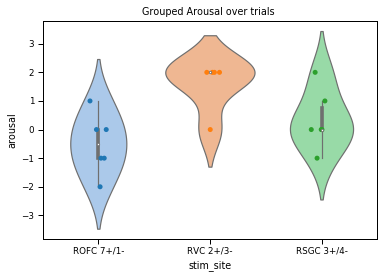

In [7]:
with plotting_context('paper'):
    ax = sns.stripplot(data=grouped_df, x ='stim_site', y='arousal')
    ax = sns.violinplot(x="stim_site", y="arousal", data=grouped_df,
                    inner='box', palette="pastel")
    plt.title("Grouped Arousal over trials ")
    plt.savefig('grouped_resp_strip.pdf', format='pdf', transparent=True, tight=True)

## b) State Dependence for OFC Stim

In [8]:
pre_measures_df = pd.read_csv("prestim_state.csv").fillna("")
pre_rofc_df = pre_measures_df[pre_measures_df.stim_site == 'pre_ROFC 7+/1-']

rofc_df = rofc_df[rofc_df.trial >101] # filter out stim survey
rofc_trials = rofc_df.trial.values

## consolidate pre-state measurements with mood measurements after stim

tmp = stim_resp_df[stim_resp_df.trial.isin(rofc_trials)].copy() # Sort trials 
rofc_state_df = pre_rofc_df.append(tmp).sort_values("trial")

In [9]:
rofc_state_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
0,pre_ROFC 7+/1-,sham,1,0,0,sham 1,104.5,,,
104,ROFC 7+/1-,1Hz 6mA 3+min,0,0,-1,sham 1,105.0,1Hz,6mA,3+min
1,pre_ROFC 7+/1-,sham,0,0,0,sham 2,109.5,,,
109,ROFC 7+/1-,1Hz 6mA 3+min,-1,2,0,sham 2,110.0,1Hz,6mA,3+min
2,pre_ROFC 7+/1-,sham,-1,1,0,sham 3,124.5,,,
124,ROFC 7+/1-,1Hz 6mA 3+min,-2,-1,0,sham 3,125.0,1Hz,6mA,3+min
3,pre_ROFC 7+/1-,baseline,1,-1,0,continuous,140.5,,,
140,ROFC 7+/1-,1Hz 6mA 3+min,-1,1,0,continuous,141.0,1Hz,6mA,3+min


In [10]:
## Reference Pre trial likert scale entries from clinical notes and fill in rows before 
rofc_state_df['state'] = [0,1,0,1,0,1,0,1] # label pre, 0 and post stim as 1


In [11]:
rofc_state_df[rofc_state_df.state==0].to_csv("rofc_pre.csv")

In [12]:
rofc_state_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration,state
0,pre_ROFC 7+/1-,sham,1,0,0,sham 1,104.5,,,,0
104,ROFC 7+/1-,1Hz 6mA 3+min,0,0,-1,sham 1,105.0,1Hz,6mA,3+min,1
1,pre_ROFC 7+/1-,sham,0,0,0,sham 2,109.5,,,,0
109,ROFC 7+/1-,1Hz 6mA 3+min,-1,2,0,sham 2,110.0,1Hz,6mA,3+min,1
2,pre_ROFC 7+/1-,sham,-1,1,0,sham 3,124.5,,,,0
124,ROFC 7+/1-,1Hz 6mA 3+min,-2,-1,0,sham 3,125.0,1Hz,6mA,3+min,1
3,pre_ROFC 7+/1-,baseline,1,-1,0,continuous,140.5,,,,0
140,ROFC 7+/1-,1Hz 6mA 3+min,-1,1,0,continuous,141.0,1Hz,6mA,3+min,1


In [13]:
## Color map to match arousal states 
cmap = dict(zip([-2,-1,0,1,2],['navy', 'blue', 'grey', 'yellow', 'gold']))

In [14]:
tmp1  = rofc_state_df[rofc_state_df.state ==1][['arousal','pos_neg','somatic']].reset_index()
tmp2 =  rofc_state_df[rofc_state_df.state ==0][['arousal','pos_neg','somatic'] ].reset_index()

rofc_change_df = tmp1 - tmp2
rofc_change_df['valence_state'] = ['neutral/high','neutral/high','low','neutral/high']


In [15]:
rofc_melt_df = rofc_change_df.melt(id_vars=['valence_state'],\
                                   value_vars=['arousal','pos_neg'],var_name='likert_dim',value_name='state')
rofc_melt_df

,valence_state,likert_dim,state
0,neutral/high,arousal,-1
1,neutral/high,arousal,-1
2,low,arousal,-1
3,neutral/high,arousal,-2
4,neutral/high,pos_neg,0
5,neutral/high,pos_neg,2
6,low,pos_neg,-2
7,neutral/high,pos_neg,2


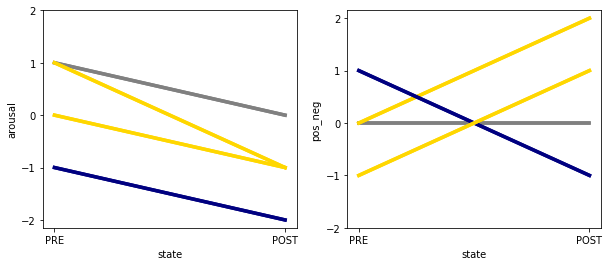

In [16]:
_,[ax1,ax2] = plt.subplots(1,2, figsize=(10,4))

with plotting_context('paper',rc={"lines.linewidth": 3.5}):

    for stim_sesh in rofc_state_df.stim_sesh:
        sesh_df = rofc_state_df[rofc_state_df.stim_sesh ==stim_sesh]
        mood_change = int(np.diff(sesh_df.pos_neg))
        sns.lineplot(data=sesh_df, x="state", y='arousal', color = cmap[mood_change], ax=ax1)
        ax1.set_xticks([0,1])
        ax1.set_xticklabels(['PRE', "POST"])
        ax1.set_yticks(np.arange(-2,3))
    for stim_sesh in rofc_state_df.stim_sesh:
        sesh_df = rofc_state_df[rofc_state_df.stim_sesh ==stim_sesh]
        mood_change = int(np.diff(sesh_df.pos_neg))
        sns.lineplot(data=sesh_df, x="state", y='pos_neg', color = cmap[mood_change], ax=ax2)
        ax2.set_xticks([0,1])
        ax2.set_xticklabels(['PRE', "POST"])
        ax2.set_yticks(np.arange(-2,3))    

    plt.savefig('ROFC State change.pdf', format='pdf', transparent=True, tight=True,)

### c) State dependence for SGC and VC/CS

#### RSGC State Dependence



In [29]:
pre_rsgc_df = pre_measures_df[pre_measures_df.stim_site == 'pre_rsgc 3+/4-']


## consolidate pre-state measurements with mood measurements after stim

rsgc_df = rsgc_df[rsgc_df.trial >101] # filter out stim survey
rsgc_trials = rsgc_df.trial.values

tmp = stim_resp_df[stim_resp_df.trial.isin(rsgc_trials)].copy() # Sort trials 
rsgc_state_df = pre_rsgc_df.append(tmp).sort_values("trial")
rsgc_state_df['state'] = [0,1,0,1,0,1,0,1]

rsgc_state_df.loc[129,'stim_sesh'] = "sham3_1"
rsgc_state_df.loc[132,'stim_sesh'] = "sham3_2"
## align sham session metadata

rsgc_state_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration,state
4,pre_rsgc 3+/4-,sham,-1,0,0,sham 2,115.5,,,,0
115,RSGC 3+/4-,100Hz 3mA 3+min,2,1,0,sham 2,116.0,100Hz,3mA,3+min,1
5,pre_rsgc 3+/4-,sham,0,-1,0,sham3_1,129.5,,,,0
129,RSGC 3+/4-,100Hz 3mA 3+min,1,-2,0,sham3_1,130.0,100Hz,3mA,3+min,1
6,pre_rsgc 3+/4-,sham,0,0,1,sham3_2,132.5,,,,0
132,RSGC 3+/4-,100Hz 3mA 3+min,0,-1,0,sham3_2,133.0,100Hz,3mA,3+min,1
7,pre_rsgc 3+/4-,sham,0,0,0,plasticity1,144.5,,,,0
144,RSGC 3+/4-,100Hz 3mA 15min,0,0,0,plasticity1,145.0,100Hz,3mA,15min,1


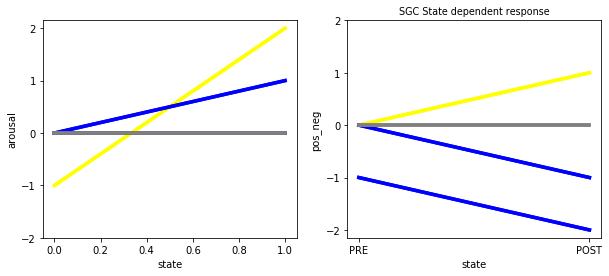

In [30]:
_,[ax1,ax2] = plt.subplots(1,2, figsize=(10,4))

with plotting_context('paper',rc={"lines.linewidth": 3.5}):
    plt.title("SGC State dependent response")
    for stim_sesh in rsgc_state_df.stim_sesh:
        sesh_df = rsgc_state_df[rsgc_state_df.stim_sesh ==stim_sesh]
        mood_change = int(np.diff(sesh_df.pos_neg))
        sns.lineplot(data=sesh_df, x="state", y='arousal', color = cmap[mood_change], ax=ax1)
        plt.xticks([0,1], labels = ['PRE', "POST"])
        ax1.set_yticks(np.arange(-2,3))
    for stim_sesh in rsgc_state_df.stim_sesh:
        sesh_df = rsgc_state_df[rsgc_state_df.stim_sesh ==stim_sesh]
        mood_change = int(np.diff(sesh_df.pos_neg))
        sns.lineplot(data=sesh_df, x="state", y='pos_neg', color = cmap[mood_change], ax=ax2)
        plt.xticks([0,1], labels = ['PRE', "POST"])
        ax2.set_yticks(np.arange(-2,3))   

    plt.savefig('rsgc State change.pdf', format='pdf', transparent=True, tight=True,)

#### RVC

In [31]:
tmp = rvc_df[rvc_df.stim_site == 'RVC 2+/3-' ]
tmp = rvc_df[rvc_df.amps == '3mA']
rvc_trials = tmp[tmp.trial >100].trial.values


pre_rvc_df = pre_measures_df.ix[[8,9,10,11]]


tmp = stim_resp_df[stim_resp_df.trial.isin(rvc_trials)].copy()
rvc_state_df =pre_rvc_df.append(tmp).sort_values("trial")
rvc_state_df.to_csv("rvc_state_df.csv", index=False)

/Users/user/Documents/projects/research_lt/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [32]:


rvc_state_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
8,preRVC 2+/30,pre stim,-1,0,0,sham 2,122.5,,,
122,RVC 2+/3-,100Hz 3mA 3+min,2,0,0,sham 2,123.0,100Hz,3mA,3+min
9,preRVC 2+/30,pre stim,0,1,0,continuous,137.5,,,
137,RVC 2+/3-,100Hz 3mA 10min,2,2,0,continuous,138.0,100Hz,3mA,10min
10,RVC 2+/3-,100Hz 2mA 3min,0,0,0,plasticity bonus,153.0,100Hz,2mA,3min
153,RVC 2+/3-,100Hz 3mA 3min,2,2,0,plasticity bonus,154.0,100Hz,3mA,3min
11,preRVC 2+/30,pre stim,0,1,0,bonus,157.5,,,
157,RVC 2+/3-,100Hz 3mA 3min,2,2,0,bonus,158.0,100Hz,3mA,3min


In [33]:
rvc_state_df['state'] = [0,1,0,1,0,1,0,1]

In [34]:
pre_measures_df = pre_measures_df.append(rvc_state_df[rvc_state_df.state==0])

/Users/user/Documents/projects/research_lt/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [35]:
rvc_state_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration,state
8,preRVC 2+/30,pre stim,-1,0,0,sham 2,122.5,,,,0
122,RVC 2+/3-,100Hz 3mA 3+min,2,0,0,sham 2,123.0,100Hz,3mA,3+min,1
9,preRVC 2+/30,pre stim,0,1,0,continuous,137.5,,,,0
137,RVC 2+/3-,100Hz 3mA 10min,2,2,0,continuous,138.0,100Hz,3mA,10min,1
10,RVC 2+/3-,100Hz 2mA 3min,0,0,0,plasticity bonus,153.0,100Hz,2mA,3min,0
153,RVC 2+/3-,100Hz 3mA 3min,2,2,0,plasticity bonus,154.0,100Hz,3mA,3min,1
11,preRVC 2+/30,pre stim,0,1,0,bonus,157.5,,,,0
157,RVC 2+/3-,100Hz 3mA 3min,2,2,0,bonus,158.0,100Hz,3mA,3min,1


In [36]:
tmp1  = rvc_state_df[rvc_state_df.state ==1][['arousal','pos_neg','somatic']].reset_index()
tmp2 =  rvc_state_df[rvc_state_df.state ==0][['arousal','pos_neg','somatic'] ].reset_index()

rvc_change_df = tmp1 - tmp2
rvc_change_df['valence_state'] = ["low",'neutral/high','low', 'neutral/high']

rvc_change_df

,index,arousal,pos_neg,somatic,valence_state
0,114,3,0,0,low
1,128,2,1,0,neutral/high
2,143,2,2,0,low
3,146,2,1,0,neutral/high


In [37]:

rvc_melt_df = rvc_change_df.melt(id_vars=['valence_state'],\
                                   value_vars=['arousal','pos_neg'],var_name='likert_dim',value_name='state')
rvc_melt_df

,valence_state,likert_dim,state
0,low,arousal,3
1,neutral/high,arousal,2
2,low,arousal,2
3,neutral/high,arousal,2
4,low,pos_neg,0
5,neutral/high,pos_neg,1
6,low,pos_neg,2
7,neutral/high,pos_neg,1


In [38]:
## Taking shortcut and manually transcribing magnitude changes
rvc_change_df['mag_change'] = [0,1,2,2]
rvc_change_df['start_arousal'] =  [-1,0,-2,0]

In [39]:
rvc_state_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration,state
8,preRVC 2+/30,pre stim,-1,0,0,sham 2,122.5,,,,0
122,RVC 2+/3-,100Hz 3mA 3+min,2,0,0,sham 2,123.0,100Hz,3mA,3+min,1
9,preRVC 2+/30,pre stim,0,1,0,continuous,137.5,,,,0
137,RVC 2+/3-,100Hz 3mA 10min,2,2,0,continuous,138.0,100Hz,3mA,10min,1
10,RVC 2+/3-,100Hz 2mA 3min,0,0,0,plasticity bonus,153.0,100Hz,2mA,3min,0
153,RVC 2+/3-,100Hz 3mA 3min,2,2,0,plasticity bonus,154.0,100Hz,3mA,3min,1
11,preRVC 2+/30,pre stim,0,1,0,bonus,157.5,,,,0
157,RVC 2+/3-,100Hz 3mA 3min,2,2,0,bonus,158.0,100Hz,3mA,3min,1


0
1
2
3


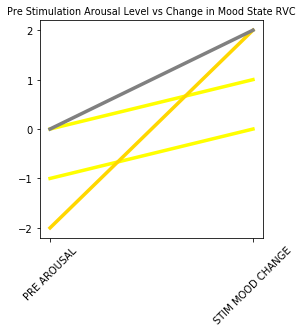

In [40]:
_,ax1 = plt.subplots(1,1, figsize=(4,4))

with plotting_context('paper',rc={"lines.linewidth": 3.5}):
        
    for i, stim_sesh in enumerate(set(rvc_state_df.stim_sesh)):
        print(i)
        sesh_df = rvc_state_df[rvc_state_df.stim_sesh ==stim_sesh]
        mood_change = int(np.diff(sesh_df.pos_neg.values))
        state_df = rvc_change_df.loc[i]
        x= [0,1]
        y = [state_df.start_arousal, state_df.mag_change]
        sns.lineplot(x=x,y=y, color = cmap[mood_change], ax=ax1)
        ax1.lines[i].set_linestyle("-")
        ax1.set_xticks([0,1])
        ax1.set_xticklabels(['PRE AROUSAL', "STIM MOOD CHANGE"], rotation=45)
        ax1.set_yticks(np.arange(-2,3))  
    plt.title("Pre Stimulation Arousal Level vs Change in Mood State RVC")

    plt.savefig('rvc State change.pdf', format='pdf', transparent=True, tight=True,)

##  d) Dose dependence of stimulation for VC/VS 

In [41]:
rvc_df.amps = rvc_df.amps.apply(lambda x: re.sub('M','m',x))
rvc_df.amps = rvc_df.amps.apply(lambda x: re.sub('a','A',x))

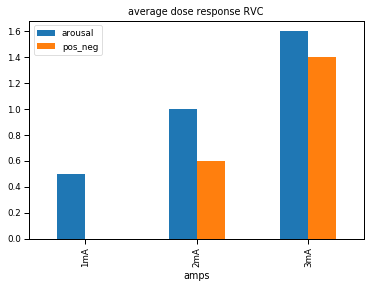

In [42]:
##Pos neg is mood on positive to negative mood valence.
with plotting_context('paper'):
    df = rvc_df.groupby('amps').mean().reset_index()
    df.plot(kind='bar', x='amps', y=['arousal', 'pos_neg'])
    plt.title(" average dose response RVC  ")

    plt.savefig('dose_avg_rvc_resp_bar.pdf', format='pdf', transparent=True, tight=True,)

## e) Response Durability

#### VC/VS

In [43]:
carry_over_df = rvc_state_df.loc[[122,123]].copy()
carry_over_df

/Users/user/Documents/projects/research_lt/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration,state
122,RVC 2+/3-,100Hz 3mA 3+min,2.0,0.0,0.0,sham 2,123.0,100Hz,3mA,3+min,1.0
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:

## fill in likert for rvc tasks pre and post stim from task notes
task_df = rvc_df[rvc_df.stim_sesh == 'tasks1'].copy()
tmp_df0 = pd.DataFrame( data=[["RVC 2+/3-", '100Hz 2mA 10min', -2,0,0, 'tasks1', 142.8, '','','','']],\
                       columns=carry_over_df.columns)
            
tmp_df1 = pd.DataFrame(\
                       data=[["RVC 2+/3-", '100Hz 2mA 10min', 1,1,0, 'tasks1', 142.8, '','','','']],\
                       columns=carry_over_df.columns)
tmp_df2 = pd.DataFrame(\
                       data=[["RVC 2+/3-", 'posttask1', 1,1,0, 'tasks1', 142.9, '','','','']],\
                       columns=carry_over_df.columns)
tmp_df3 = pd.DataFrame(\
                       data=[["RVC 2+/3-", 'posttask2', 1,0,0, 'tasks1', 143.1, '','','','']],\
                       columns=carry_over_df.columns)
## create task_df
task_df = task_df.append(tmp_df0)
task_df = task_df.append(tmp_df1)
task_df = task_df.append(tmp_df2)
task_df = task_df.append(tmp_df3)
task_df = task_df.sort_values('trial')

## Add time stamps
task_df['trial'] = [0,1,2,3,4]
task_df

,amps,arousal,duration,freq,full_params,pos_neg,somatic,state,stim_sesh,stim_site,trial
0,,-2,,,100Hz 2mA 10min,0,0,,tasks1,RVC 2+/3-,0
0,,1,,,100Hz 2mA 10min,1,0,,tasks1,RVC 2+/3-,1
0,,1,,,posttask1,1,0,,tasks1,RVC 2+/3-,2
142,2mA,2,10min,100Hz,100Hz 2mA 10min,1,0,NaN,tasks1,RVC 2+/3-,3
0,,1,,,posttask2,0,0,,tasks1,RVC 2+/3-,4


In [45]:
task_df['time'] = [0,10,20,30,40]

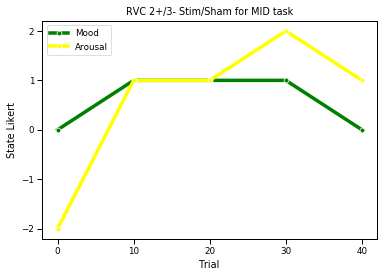

In [46]:
with plotting_context('paper',rc={"lines.linewidth": 3.5}):

#     for stim_sesh in carry_over_df.stim_sesh:
    ax = sns.lineplot(data=task_df, x="time", y='pos_neg', color='green', marker='o')
    ax = sns.lineplot(data=task_df, x="time", y='arousal', color = 'yellow', ax=ax, marker='o')
#     plt.xticks([0,1,2,3,4], labels = ['Baseline',' Stim 1', "Post Stim1", 'Stim 2', 'Post Stim2'])
    ax.set_yticks(np.arange(-2,3))
    plt.xticks([0,10,20,30,40])
    plt.ylabel("State Likert")
    plt.xlabel("Trial")
    plt.legend(['Mood', 'Arousal'])
    plt.title("RVC 2+/3- Stim/Sham for MID task")
    plt.savefig('RVC task carry over.pdf', format='pdf', transparent=True, tight=True,)

#### OFC 

In [47]:
rofc_trials = rofc_df.trial.values

trials = np.concatenate((rofc_trials, rofc_trials +1 ))
trials.sort()
trials ## Getting trials before rofc stim
rofc_state_df = stim_resp_df[stim_resp_df.trial.isin(trials)].copy()
rofc_state_df = rofc_state_df[rofc_state_df.trial >100]
rofc_state_df = rofc_state_df

In [48]:
rofc_state_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
104,ROFC 7+/1-,1Hz 6mA 3+min,0,0,-1,sham 1,105,1Hz,6mA,3+min
105,RA 2+/3-,1Hz 6mA 3+min,0,-1,0,sham 1,106,1Hz,6mA,3+min
109,ROFC 7+/1-,1Hz 6mA 3+min,-1,2,0,sham 2,110,1Hz,6mA,3+min
110,LSGC 1+/2-,100Hz 3mA 3+min,-1,0,0,sham 2,111,100Hz,3mA,3+min
124,ROFC 7+/1-,1Hz 6mA 3+min,-2,-1,0,sham 3,125,1Hz,6mA,3+min
125,LSGC 1+/2-,100Hz 3mA 3+min,0,-1,0,sham 3,126,100Hz,3mA,3+min
140,ROFC 7+/1-,1Hz 6mA 3+min,-1,1,0,continuous,141,1Hz,6mA,3+min
141,RSGC 3+4-,100Hz 3mA 10min,1,-1,0,tasks1,142,100Hz,3mA,10min


In [49]:
rofc_state_df

carry_over_df = rofc_state_df.loc[[124,125]].copy()
tmp_df0 = pd.DataFrame(data=[["ROFC 7+/1- 1Hz", 'prewashout', 0,1,1, 'sham 2', 123.1, '','','',]], columns=carry_over_df.columns)

tmp_df1 = pd.DataFrame(data=[["ROFC 7+/1- 1Hz", 'washout', -1,-1,0, 'sham 2', 123.1, '','','',]], columns=carry_over_df.columns)
tmp_df2 = pd.DataFrame(data=[["ROFC 7+/1- 1Hz", 'sham', 0,-1,0, 'sham 2', 123.2,'','','',]], columns=carry_over_df.columns)
carry_over_df = carry_over_df.append(tmp_df0)

carry_over_df = carry_over_df.append(tmp_df1)
carry_over_df = carry_over_df.append(tmp_df2)
carry_over_df.index = [0,1,4,2,3]
carry_over_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
0,ROFC 7+/1-,1Hz 6mA 3+min,-2,-1,0,sham 3,125.0,1Hz,6mA,3+min
1,LSGC 1+/2-,100Hz 3mA 3+min,0,-1,0,sham 3,126.0,100Hz,3mA,3+min
4,ROFC 7+/1- 1Hz,prewashout,0,1,1,sham 2,123.1,,,
2,ROFC 7+/1- 1Hz,washout,-1,-1,0,sham 2,123.1,,,
3,ROFC 7+/1- 1Hz,sham,0,-1,0,sham 2,123.2,,,


In [50]:
carry_over_df['trial'] = [1,4,0,2,3]

carry_over_df = carry_over_df.sort_values(by='trial')


carry_over_df['time'] = [0,3,6,9,15]

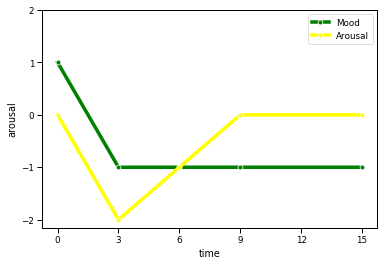

In [51]:
with plotting_context('paper',rc={"lines.linewidth": 3.5}):

#     for stim_sesh in carry_over_df.stim_sesh:
    ax = sns.lineplot(data=carry_over_df, x="time", y='pos_neg', color='green' ,marker='o')
    ax = sns.lineplot(data=carry_over_df, x="time", y='arousal', color = 'yellow', ax=ax, marker='o')
    plt.xticks([0,3,6,9,12,15]) #labels = ['Pre ROFC Stim','ROFC Stim', "washout", 'sham', 'LSGC Stim'])
    ax.set_yticks(np.arange(-2,3))
    plt.legend(['Mood', 'Arousal'])

    plt.savefig('ROFC carry over.pdf', format='pdf', transparent=True, tight=True,)
        

#### SGC

In [52]:
#assemble carrover df by looking back at pre and post stim from sham control and add likert from  those notes

rsgc_carry_trial = 116
next_trial = 117

rsgc_carryover_df = stim_resp_df[stim_resp_df.trial.isin([116,117])].copy()
tmp_df1 = pd.DataFrame(\
                       data=[["pre", 'pre', -1,0,0, 'sham2', 115.6, '','','']],\
                       columns=rsgc_carryover_df.columns)

tmp_df2 = pd.DataFrame(\
                       data=[["post", 'post', -1,1,0, 'sham2', 116.6, '','','']],\
                       columns=rsgc_carryover_df.columns)
tmp_df3 = pd.DataFrame(\
                       data=[["post", 'post', -1,0,0, 'sham2', 116.7, '','','']],\
                       columns=rsgc_carryover_df.columns)
rsgc_carryover_df = rsgc_carryover_df.append(tmp_df1)
rsgc_carryover_df = rsgc_carryover_df.append(tmp_df3)
rsgc_carryover_df = rsgc_carryover_df.append(tmp_df2).sort_values(by=['trial'])
rsgc_carryover_df

,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
0,pre,pre,-1,0,0,sham2,115.6,,,
115,RSGC 3+/4-,100Hz 3mA 3+min,2,1,0,sham 2,116.0,100Hz,3mA,3+min
0,post,post,-1,1,0,sham2,116.6,,,
0,post,post,-1,0,0,sham2,116.7,,,
116,LSGC 3+/4-,100Hz 3mA 3+min,0,-1,-1,sham 2,117.0,100Hz,3mA,3+min


In [53]:
rsgc_carryover_df['time'] = [0, 3,6, 9,15]

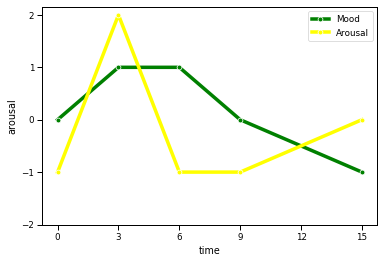

In [54]:
rsgc_carryover_df['trial'] = [0,1,2,3,4]
with plotting_context('paper',rc={"lines.linewidth": 3.5}):

#     for stim_sesh in carry_over_df.stim_sesh:
    ax = sns.lineplot(data=rsgc_carryover_df, x="time", y='pos_neg', color='green', marker='o')
    ax = sns.lineplot(data=rsgc_carryover_df, x="time", y='arousal', color = 'yellow', ax=ax, marker='o')
#     plt.xticks([0,1,2,3,4], labels = ['Pre RSGC Stim','RSGC Stim', "washout", 'sham', 'LSGC Stim'])
    ax.set_yticks(np.arange(-2,3))
    plt.xticks([0,3,6,9,12,15])
    plt.legend(['Mood', 'Arousal'])
    

    plt.savefig('RSGC carry over.pdf', format='pdf', transparent=True, tight=True,)
        